# Fourier Analysis of Time Series
In this notebook, we perform a complete Fourier analysis of a time series. The main objective is to decompose the signal into its constituent frequency components using the Fourier Transform, identify and filter out unwanted frequencies (such as noise), and then reconstruct the cleaned signal through the Inverse Fourier Transform.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

%matplotlib inline

The function $f(t)$ represents a time series composed of several sinusoidal components with different frequencies and a random noise term $n$. Such a signal can model various time-dependent phenomena, such as fluctuations in the stock market, electrical or acoustic signals, or even periodic patterns in physical or biological systems. Analyzing it allows us to study both its periodic behavior and the influence of randomness over time.
$$f(t) = 2 \, \sin(4t) + \sin(t) + \cos\left(\frac{t}{4}\right) + n$$

In [82]:
N = 100      # N samples
DT = 10 / N  # Time step

t = np.array(range(1, N + 1)) * DT
f = 2 * np.sin(4 * t) + np.sin(t) + np.cos(t / 4) + t + np.random.uniform(0, 2, size=t.shape)

## Fourier Transform and Inverse Fourier Transform
The Fourier Transform represents the frequency-domain decomposition of the time-domain signal $f(t)$. It expresses the original signal as a combination of complex exponentials, each corresponding to a specific frequency component. This transformation is fundamental in fields such as signal processing, physics, and finance, as it reveals how different frequencies contribute to the overall behavior of the system. The Fourier Transform of a signal $f(t)$ is defined as:
$$
F(\omega) = \int_{-\infty}^{\infty} f(t) \, e^{-i \omega t} \, dt
$$

The inverse Fourier Transform allows us to recover the original time-domain signal from its frequency-domain representation:
$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) \, e^{i \omega t} \, d\omega
$$

In other words, the original signal can be reconstructed by integrating over all frequency components, each weighted by its corresponding Fourier coefficient. This duality between the time and frequency domains is a key concept in analyzing and processing signals.



In [83]:
fourier_transform = fft(f)
magnitude = np.abs(fourier_transform)
frequencies = fftfreq(f.shape[0], DT)

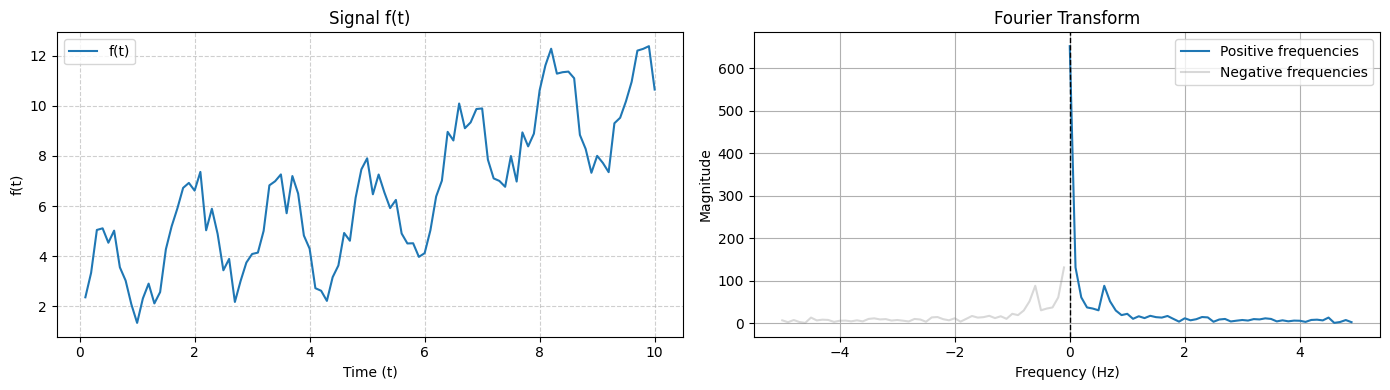

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(t, f, label='f(t)')
axes[0].set_title('Signal f(t)')
axes[0].set_xlabel('Time (t)')
axes[0].set_ylabel('f(t)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label='Positive frequencies')
axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')
axes[1].axvline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_title("Fourier Transform")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Magnitude")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

We want to split the frequencies into different intervals, so that each interval $\Omega_i = (\omega_1, \omega_2)$ contains relevant information. Lower frequencies are associated to longer-trends whereas higher frequencies with noise. It is important to not overlap intervals:
$$\bigcap_{i=1}^n = \emptyset$$

In [85]:
Omega_1 = (0.00, 0.20)
Omega_2 = (0.20, 0.50)
Omega_3 = (0.50, 0.80)
Omega_4 = (0.80, max(frequencies))

intervals = [Omega_1, Omega_2, Omega_3, Omega_4]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

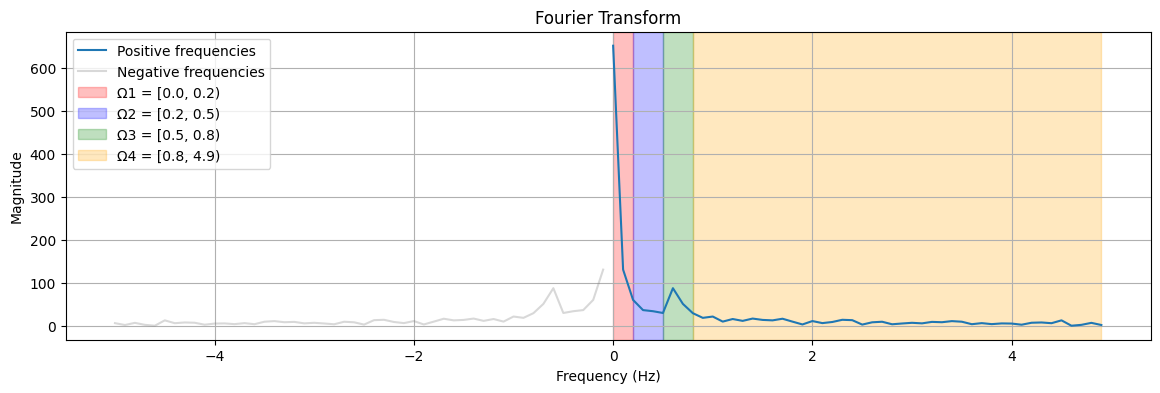

In [86]:
def plot_intervals() -> None:
  plt.figure(figsize=(14,4))
  plt.plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label='Positive frequencies')
  plt.plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')

  for i, interval in enumerate(intervals):
    color = colors[i % len(colors)]
    plt.axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i + 1} = [{interval[0]}, {interval[1]})')

  plt.title("Fourier Transform")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.grid(True)
  plt.legend()
  plt.show()

plot_intervals()

## Filtering using intervals of frequencies

If we have an interval of frequencies $\Omega = (\omega_1, \omega_2)$ that is relevant, for instance, the frequencies that represent a sesonality, or the ones that represent the noise. We can filter $F(\omega)$ by defining a new function $\hat{F}(\omega)$ that:

$$
\hat{F}(\omega)
\begin{cases}
F(\omega) & \text{if}\; \omega \in \Omega \\
0 & \text{if}\; \omega \notin \Omega
\end{cases}
$$

We can return to the time domain by using the Inverse Fourier Transform. As we can see, the Inverse Fourier Transform of $\hat{F}(\omega)$ is nothing more than the Inverse Fourier Transform of $F(\omega)$ in our interval of interest $\Omega$:

$$\psi(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{F}(\omega) \, e^{i \omega t} \, d\omega = \frac{1}{2\pi} \left( \int_{\mathbb{R} ∖ \Omega} \hat{F}(\omega) \, e^{i \omega t} \, d\omega + \int_{\Omega} \hat{F}(\omega) \, e^{i \omega t} \, d\omega\right) = \frac{1}{2\pi} \left( 0 + \int_{\Omega} F(\omega) \, e^{i \omega t} \, d\omega \right)$$

$$\psi(t) = \frac{1}{2\pi} \int_{\Omega} F(\omega) \, e^{i \omega t} \, d\omega$$

In the case of having multiple intervals of interest, we can reconstruct the complete time series with all the relevant information:

$$\psi(t) = \psi_1(t) + \psi_2(t) + \cdots + \psi_n(t) = \sum_i \psi_i(t)$$

$$\sum_i \psi_i(t) = \frac{1}{2\pi} \left( \int_{\Omega_1} F(\omega) \, e^{i \omega t} \, d\omega + \int_{\Omega_2} F(\omega) \, e^{i \omega t} \, d\omega + \cdots + \int_{\Omega_n} F(\omega) \, e^{i \omega t} \, d\omega \right) = $$

$$\psi(t) = \sum_i \psi_i(t) =  \frac{1}{2\pi} \int_{\bigcup_i \Omega_i} F(\omega) \, e^{i \omega t} \, d\omega$$


In [87]:
def filter() -> tuple[list, list]:

  F_hat: list[np.array] = []
  psi: list[np.array] = []

  for low, high in intervals:

      F_hat_i = fourier_transform.copy()

      mask_i = (np.abs(frequencies) >= low) & (np.abs(frequencies) < high)
      F_hat_i[~mask_i] = 0

      psi_i = ifft(F_hat_i).real

      F_hat.append(F_hat_i)
      psi.append(psi_i)

  return F_hat, psi

F_hat, psi = filter()


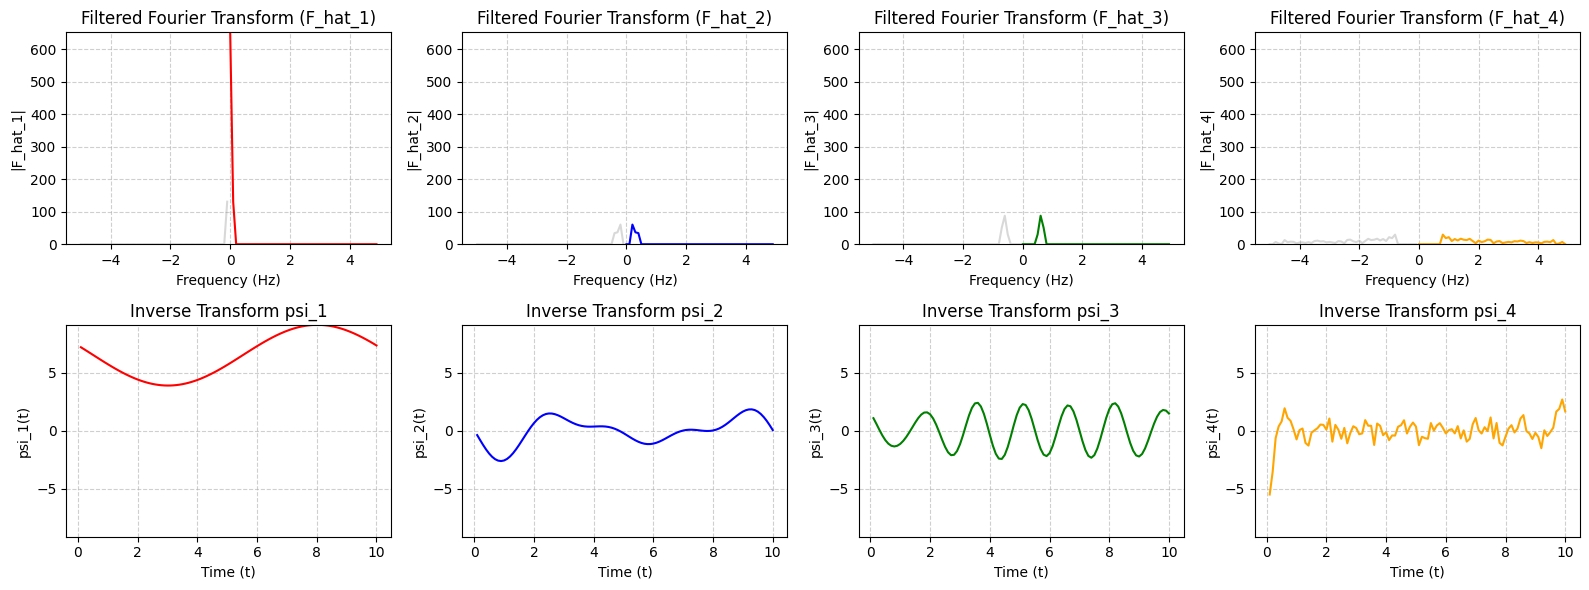

In [88]:
def plot_decomposition() -> None:

  n = len(intervals)
  max_F = max(np.max(np.abs(F_hat_i)) for F_hat_i in F_hat)
  max_psi = max(np.max(np.abs(psi_i)) for psi_i in psi)

  fig, axes = plt.subplots(2, n, figsize=(4 * n, 6))

  for i in range(n):

      color = colors[i % len(colors)]

      # Fourier Transform
      ax = axes[0, i]
      ax.set_title(f"Filtered Fourier Transform (F_hat_{i+1})")

      ax.plot(frequencies[frequencies >= 0],
              np.abs(F_hat[i])[frequencies >= 0], color=color)

      ax.plot(frequencies[frequencies < 0],
              np.abs(F_hat[i])[frequencies < 0],
              color='gray', alpha=0.3)

      ax.set_xlabel("Frequency (Hz)")
      ax.set_ylabel(f"|F_hat_{i+1}|")
      ax.set_ylim(0, max_F)
      ax.grid(True, linestyle='--', alpha=0.6)

      # Inverse Transform
      ax = axes[1, i]
      ax.plot(t, psi[i], color=color)
      ax.set_title(f"Inverse Transform psi_{i+1}")

      ax.set_xlabel("Time (t)")
      ax.set_ylabel(f"psi_{i+1}(t)")
      ax.set_ylim(-max_psi, max_psi)
      ax.grid(True, linestyle='--', alpha=0.6)

  plt.tight_layout()
  plt.show()

plot_decomposition()

Now it becomes easier to distinguish the deterministic components from the noise. One of the main advantages of using the Fourier Transform is that, depending on our goals, we can selectively isolate the deterministic functions we are interested in and analyze them independently. For example, if we are working with stock market time series and want to study long-term trends, we can focus on $\psi_1(t)$. If instead we are interested in short-term fluctuations, we might choose to work with $\psi_3(t)$.

* Deterministic: $\psi_1(t), \psi_2(t)$ and $\psi_3(t)$.
* Stochastic: $\psi_4(t)$

If we want to denoise the time series, we can simply add together the deterministic components, or equivalently, remove the noise component from the full signal:
$$\hat{f}(t) = \frac{1}{2\pi} \int_{\bigcup_{i=1}^3 \Omega_i} F(\omega) \, e^{i \omega t} \, d\omega = \sum_{i=1}^3 \psi_i(t) \quad \rightarrow \quad \hat{f}(t) = f(t) - \psi_4(t)$$

In [89]:
f_hat = f - psi[3]

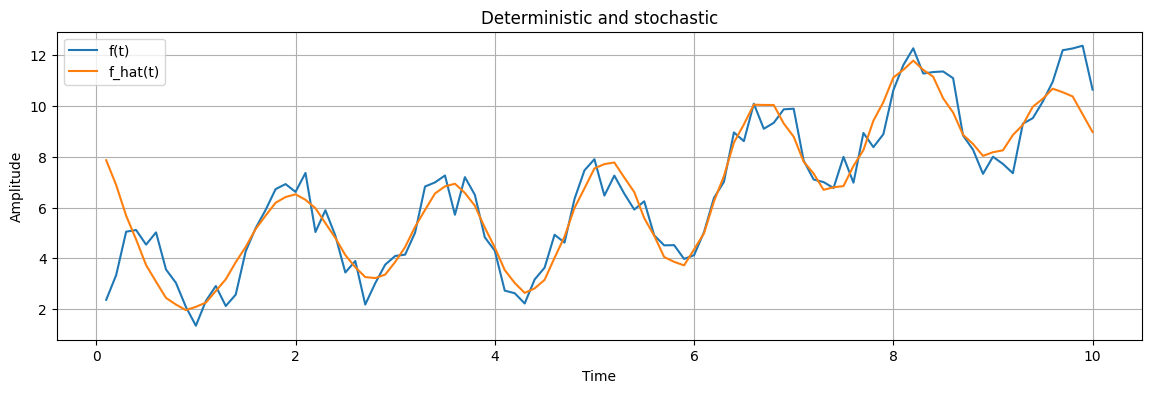

In [90]:
plt.figure(figsize=(14,4))
plt.plot(t, f, label='f(t)')
plt.plot(t, f_hat, label='f_hat(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Deterministic and stochastic')
plt.legend()
plt.grid(True)
plt.show()

## Finding the intervals of frequency automatically
We can see that a frequency is relevant if there is a significant variation of the magnitude $A(\omega)$, so we can compute its derivative:

$$A(\omega) = \left | F(\omega) \right | = \sqrt{F(\omega) \, F^*(\omega)} \quad \rightarrow \quad \frac{dA}{d\omega} = \Re \left \{ \frac{F^*(\omega)}{\left | F(\omega) \right |} \frac{dF}{d\omega} \right \}$$

$$\frac{dF}{d\omega} = \frac{d}{d\omega} \int_{-\infty}^{\infty} f(t) \, e^{-i \omega t} \, dt = -i \int_{-\infty}^{\infty} t\, f(t) \, e^{-i \omega t} \, dt = -i \, \mathcal{F}\{ t \, f(t)\}$$

A way of determine if a change is big enough is normalizing the derivative and comparing it with a threshold $\tau$:
$$\frac{1}{H_{max}}\left |\frac{dA}{d\omega} \right | \ge \tau \quad \rightarrow \quad \left |\frac{dA}{d\omega} \right | \ge H_{max} \, \tau \quad \quad \tau \in [0, 1]$$
Since $A(\omega)$ is always positive:
$$H_{max} = \max(A(\omega), 0)$$
Higher values of $\tau$ means less and bigger intervals (there are variations that are less than $\tau$ so those frequencies are considered in the same interval), whereas lower values of $\tau$ generates more and smaller intervals (almost every variation is greater than $\tau$ so it creates another interval).

In [91]:
# Fourier Transform derivative
F = fourier_transform
F_prime = -1j * fft(t * f)

A = np.abs(F)

# Avoid zero divisions
eps = 1e-12
A_safe = np.where(A == 0, eps, A)

# Magnitude derivative
dA_dw = np.real( (np.conj(F) / A_safe) * F_prime)

# Find relevant frequencies
tau = 0.15

H_max = np.max(A)
selected_freqs = [0.0]

for i, dA_dw_i in enumerate(dA_dw):
  if np.abs(dA_dw_i) >= H_max * tau:
    freq = frequencies[i]
    if freq > 0:
      selected_freqs.append(freq)

selected_freqs = np.array(selected_freqs)


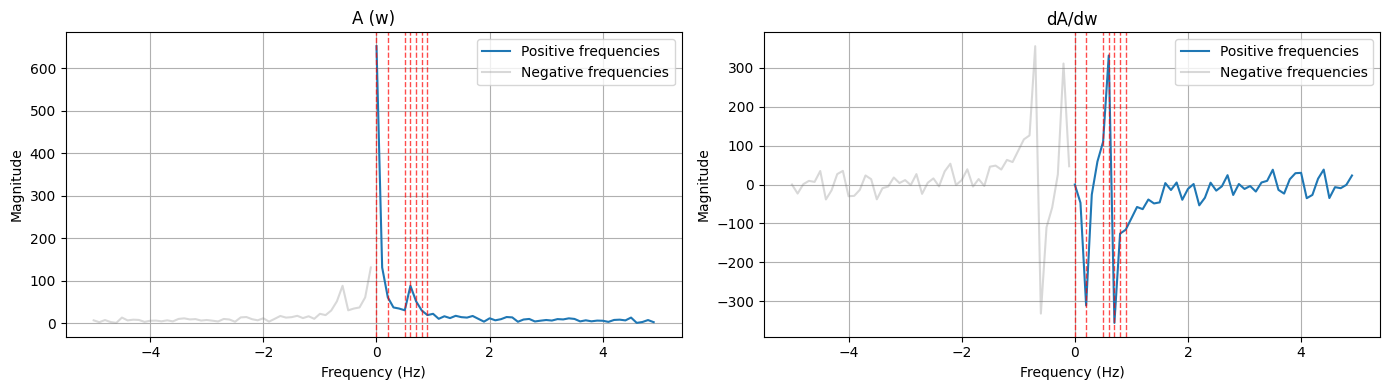

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(frequencies[frequencies >= 0], A[frequencies >= 0], label='Positive frequencies')
axes[0].plot(frequencies[frequencies < 0], A[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')
axes[0].set_title("A (w)")
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Magnitude")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(frequencies[frequencies >= 0], dA_dw[frequencies >= 0], label='Positive frequencies')
axes[1].plot(frequencies[frequencies < 0], dA_dw[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')
axes[1].set_title("dA/dw")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Magnitude")
axes[1].grid(True)
axes[1].legend()

for zf in selected_freqs:
    axes[0].axvline(zf, color='red', linestyle='--', linewidth=1, alpha=0.7)
    axes[1].axvline(zf, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.show()

Now we can just define each interval $\Omega_i$ like the space between every maximum detected.

In [93]:
intervals = []
for i in range(len(selected_freqs) - 1):

  low = selected_freqs[i]
  high = selected_freqs[i + 1]

  Omega_i = (low, high)
  intervals.append(Omega_i)

intervals = intervals
F_hat, psi = filter()

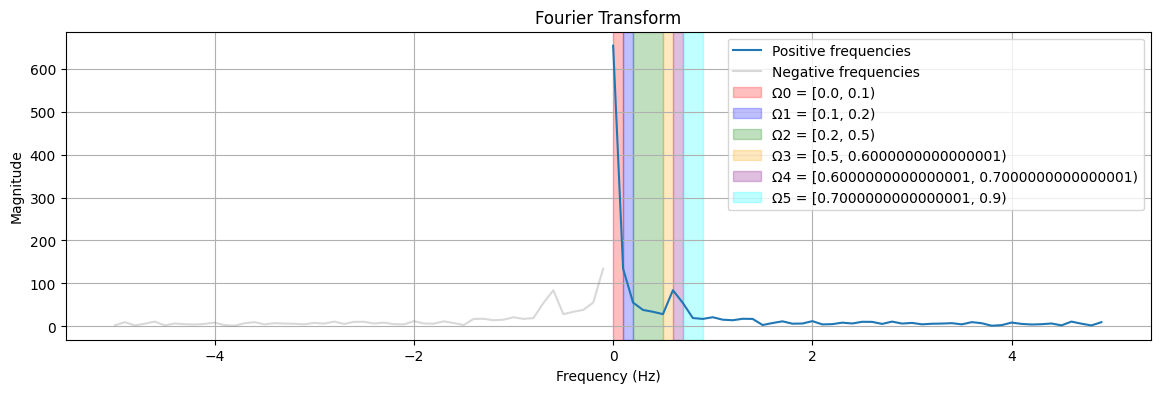

In [78]:
plot_intervals()

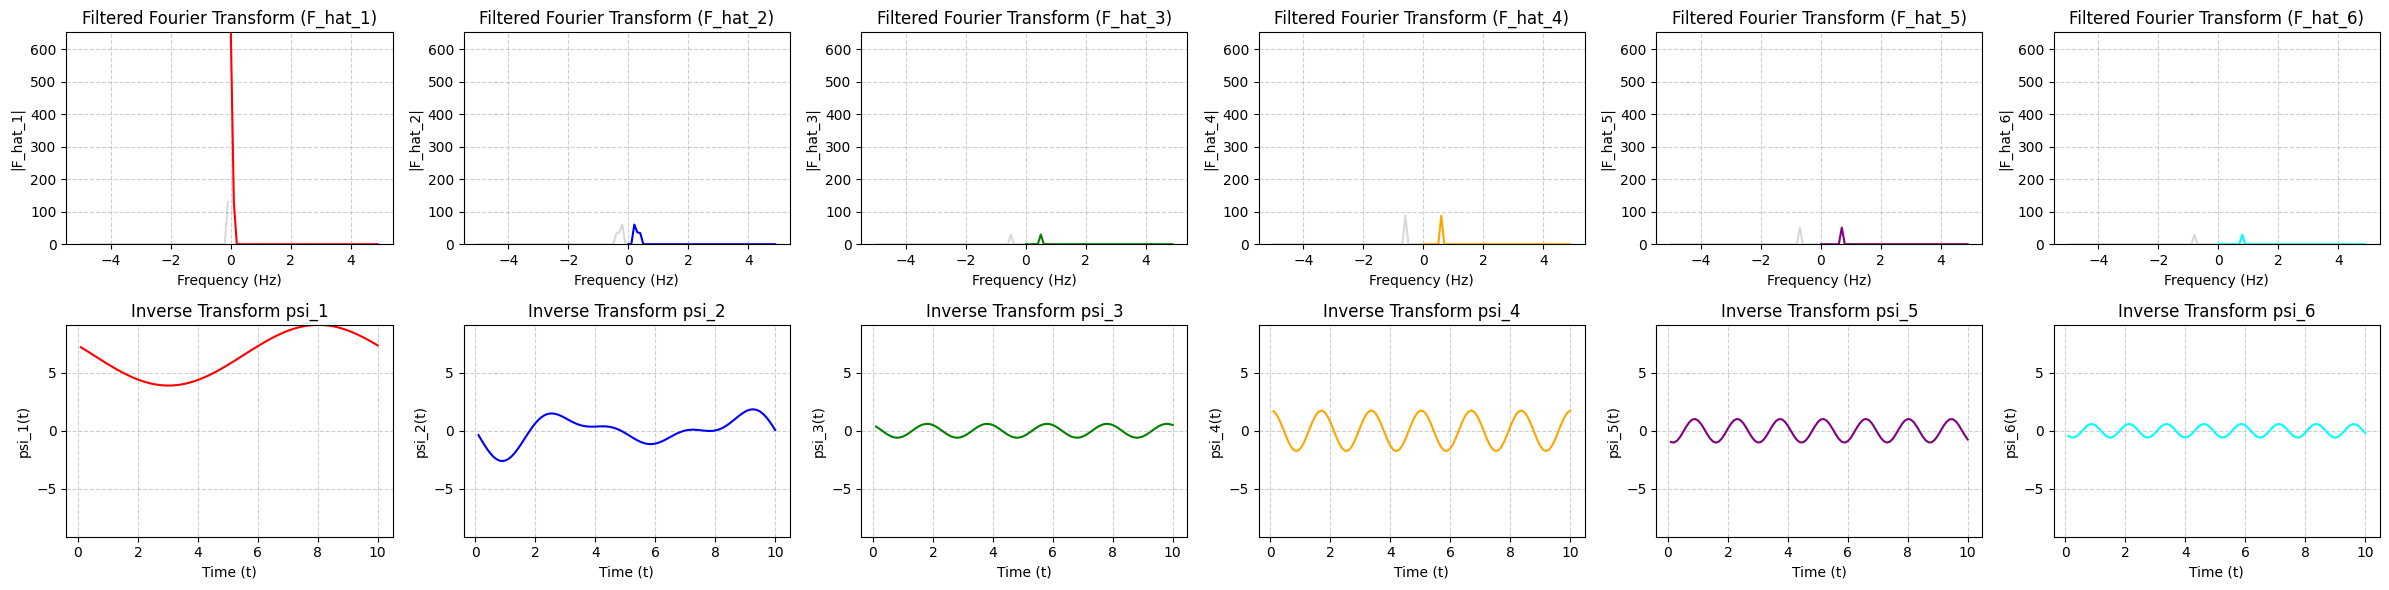

In [94]:
plot_decomposition()

We have automatically identified the deterministic components. As explained earlier, we can select only the ones that are relevant to our analysis. Alternatively, we can sum all of them to obtain the full deterministic part. The remaining noise is simply the difference between the original time series and this complete deterministic component.

$$\hat{f}(t) = \frac{1}{2\pi} \int_{\bigcup_{i} \Omega_i} F(\omega) \, e^{i \omega t} \, d\omega = \sum_{i} \psi_i(t) \quad \rightarrow \quad n(t) = \hat{f}(t) - f(t)$$


In [95]:
f_hat = np.sum(psi, axis=0)
n = f - f_hat

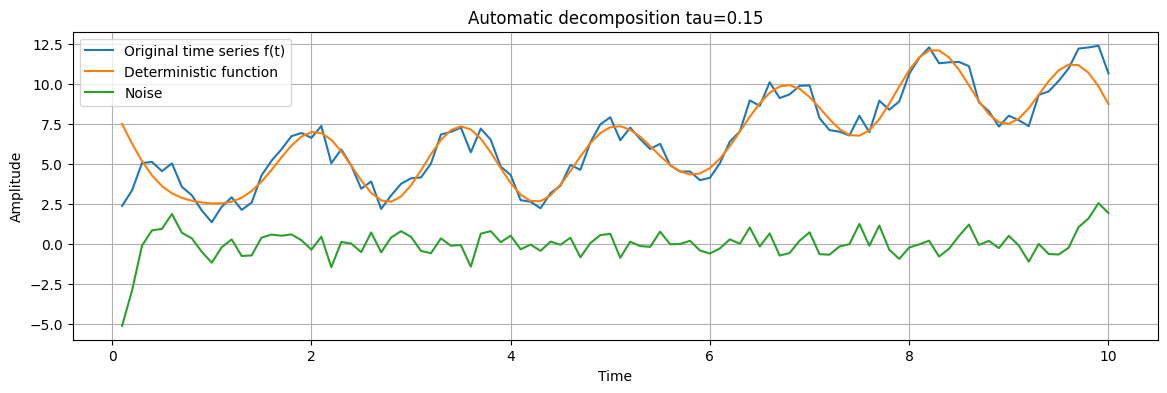

In [96]:
plt.figure(figsize=(14,4))
plt.plot(t, f, label='Original time series f(t)')
plt.plot(t, f_hat, label='Deterministic function')
plt.plot(t, n, label='Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Automatic decomposition tau={tau}')
plt.legend()
plt.grid(True)
plt.show()